# Numerical Integration

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from scipy import stats as sts

## Problem 1

In [22]:
def  numericalIntegral(g, a, b, N, method):
    
    int_sum = 0
    
    if method == 'midpoint':
        x = np.zeros(N, dtype=np.float64)
        for i in range(N):
            x[i] = a + (2*i + 1)*(b - a) / (2*N)
            int_sum += g(x[i])
            
        int_sum = (b - a) / N*int_sum
        
    elif method == 'trapezoid':
        x = np.zeros(N + 1, dtype=np.float64)
        for i in range(N + 1):
            x[i] = a + i*(b - a) / N
            if i == 0:
                int_sum += g(x[i])
            elif i == N:
                int_sum += g(x[i])
            elif i != N and i != 0:
                int_sum += 2 * g(x[i])
                
        int_sum = (b - a) / (2*N) * int_sum
        
    elif method == 'Simpsons':
        x = np.zeros(2*N + 1, dtype=np.float64)
        for i in range(2*N + 1):
            x[i] = a + ( i*(b - a) / (2*N) )
            if i == 0:
                int_sum += g(x[i])
            elif i == 2*N:
                int_sum += g(x[i])
            elif i % 2 == 1:
                int_sum += 4 * g(x[i])
            elif i % 2 == 0:
                int_sum += 2 * g(x[i])  
                
        int_sum *= (b - a) / ( 3*(2*N + 1) )
        
    else:
        raise ValueError('Choose a valid method')    
        
    return int_sum

In [23]:
g = lambda x: .1 * x ** 4 - 1.5 * x ** 3 + .53 * x ** 2 + 2 * x + 1

In [24]:
midpoint = numericalIntegral(g, -10, 10, 10000, 'midpoint')
print('Integral computed via midpoint method:  ', midpoint)
trap = numericalIntegral(g, -10, 10, 10000, 'trapezoid')
print('Integral computed via trapezoid method: ', trap)
simp = numericalIntegral(g, -10, 10, 10000, 'trapezoid')
print('Integral computed via Simpson method:   ', simp)

Integral computed via midpoint method:   4373.333196466632
Integral computed via trapezoid method:  4373.333607066684
Integral computed via Simpson method:    4373.333607066684


## Problem 2

In [25]:
def nc_approx_normal(mu, sd, N, k):
    
    z = np.linspace(mu - k*sd, mu + k*sd, N)
    w = np.zeros(N, dtype=np.float64)
    
    for i in range(1, N+1):
        if i == 1:
            w[i-1] = sts.norm.cdf((z[i-1] + z[i]) / 2, loc=mu, scale=sd)
        elif i == N:
            w[i-1] = 1 - sts.norm.cdf((z[N-2] + z[N-1]) / 2, loc=mu, scale=sd)
        else:
            w[i-1] = sts.norm.pdf(z[i-1], loc=mu, scale=sd)*(z[N-1] - z[0])/N
    
    return w, z

w:  [1.59108590e-04 1.73388233e-03 1.62869311e-02 8.06696979e-02
 2.10684766e-01 2.90139840e-01 2.10684766e-01 8.06696979e-02
 1.62869311e-02 1.73388233e-03 1.59108590e-04]
Z:  [-4.  -3.2 -2.4 -1.6 -0.8  0.   0.8  1.6  2.4  3.2  4. ]


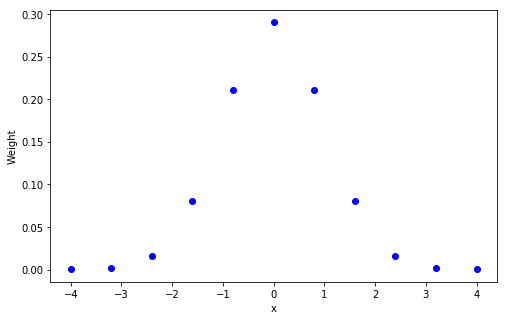

In [28]:
w, z = nc_approx_normal(0, 1, 11, 4)
print('w: ', w)
print('Z: ', z)
fig = plt.figure(figsize=(8,5))
plt.plot(z, w, 'bo')
plt.xlabel('x')
plt.ylabel('Weight')
plt.show()

## Problem 3

In [29]:
def approx_log_norm(mu, sd, N, k):
    
    w, z = nc_approx_normal(mu, sd, N, k)
    A = np.exp(z)
    
    return w, A

w:  [1.59108590e-04 1.73388233e-03 1.62869311e-02 8.06696979e-02
 2.10684766e-01 2.90139840e-01 2.10684766e-01 8.06696979e-02
 1.62869311e-02 1.73388233e-03 1.59108590e-04]

A:  [1.83156389e-02 4.07622040e-02 9.07179533e-02 2.01896518e-01
 4.49328964e-01 1.00000000e+00 2.22554093e+00 4.95303242e+00
 1.10231764e+01 2.45325302e+01 5.45981500e+01]


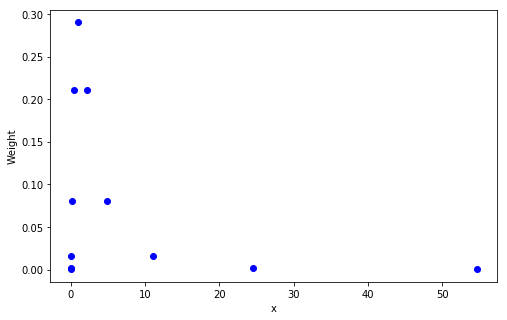

In [32]:
w, A = approx_log_norm(0, 1, 11, 4)
print('w: ', w)
print('')
print('A: ', A)
fig = plt.figure(figsize=(8,5))
plt.plot(A, w, 'bo')
plt.xlabel('x')
plt.ylabel('Weight')
plt.show()

## Problem 4

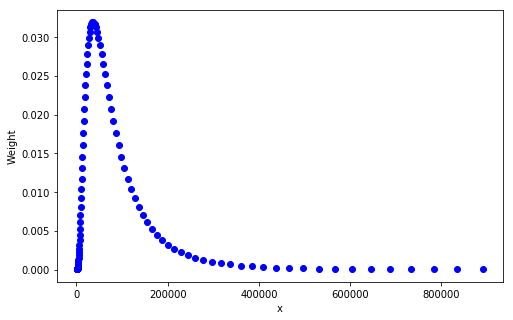

In [34]:
mu = 10.5
sd = .8
N = 100
k = 4
w, A = approx_log_norm(mu, sd, N, k)
fig = plt.figure(figsize=(8,5))
plt.plot(A, w, 'bo')
plt.xlabel('x')
plt.ylabel('Weight')
plt.show()

In [36]:
exact = np.exp(mu + (sd**2)/2)
print('Exact expected value:        ', exact)
aveinc = np.average(A, weights=w)
print('Approximated expected value: ', aveinc)

Exact expected value:         50011.087008521754
Approximated expected value:  50005.43188241741


## Problem 6

In [37]:
val, error = integrate.quad(g, -10, 10)
print('Value: ', val)
print('Error: ', error)

Value:  4373.333333333334
Error:  8.109531705284936e-11


## Problem 7

In [38]:
def montecarlo(g, Omega, N):
    x_min, x_max = Omega
    x = np.random.uniform(x_min, x_max, (2, N))
    return (4 / N) * np.sum(g(x[0], x[1]))

In [44]:
g = lambda x, y: np.sum(x ** 2 + y ** 2 <= 1)

Omega = np.array([-1, 1])
print('Approximate pi with 1e5 points: ', montecarlo(g, Omega, int(1e5)))
print('Approximate pi with 1e7 points: ', montecarlo(g, Omega, int(1e7)))

Approximate pi with 1e5 points:  3.1436800000000003
Approximate pi with 1e7 points:  3.1415395999999998
